## **Extracción de Datos y Creación de Base de Datos** 

In [4]:
# Libreria para la base de datos
import sqlite3

# Crear y conectarse a la base de datos inicial
con = sqlite3.connect("../dataV3/raw/wine_store.db")

### **Primer Scraping:** Obtener información primaria de los productos de la CAV

In [2]:
# Librerias para la web scrapping
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup as soup

# scrapping de la pagina: https://cav.cl/tienda
data_wine = []
driver = webdriver.Chrome()
for x in range(50):
    url = f"https://cav.cl/tienda?q=&hPP=20&idx=products&p={x}&fR%5Bfamily.name%5D%5B0%5D=Vinos&is_v=1"
    driver.get(url)
    driver.implicitly_wait(3)
    try:
        age_verification_popup = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'modalAge'))
        )
        yes_button = age_verification_popup.find_element(By.XPATH, "//button[contains(., 'SI')]")
        yes_button.click()
    except:
        pass
    
    page_soup = soup(driver.page_source, 'html.parser')
    
    info = []
    for article in page_soup.find_all("article"):
        id = article.attrs.get("data-id")
        sku = article.attrs.get("data-sku")
        name = article.attrs.get("data-name")
        brand = article.attrs.get("data-brand")
        category = article.attrs.get("data-category")
        variant = article.attrs.get("data-variant")
        ref = article.find("a").attrs.get("href")
        info.append([id, sku, name, brand, category, variant, ref])
    
    data_wine.append(info)
    
driver.quit()

In [3]:
# Redimensionar la data extraida
rs_data_wine = []

for sublist in data_wine:
    rs_data_wine.extend(sublist)
    
# primera vista de los datos
rs_data_wine

[['13665',
  '30366',
  'Pack Espumante La Capitana Chardonnay + Rose - Brut',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-espumante-la-capitana-chardonnay-rose-brut-30366'],
 ['14297',
  '31486',
  'Pack Centellino + Vino Viña Marty Kalak Ensamblaje Tinto 2019',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-centellino-vino-vina-marty-kalak-ensamblaje-tinto-2019-31486'],
 ['14292',
  '31481',
  'Pack Decantandor U Joes + Vino Viña Andes Plateau Andesita Cs',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-decantandor-u-joes-vino-vina-andes-plateau-andesita-cs-31481'],
 ['14291',
  '31480',
  'Pack Copas Riedel Overture + Vino Clos De Luz Massal 1945',
  'Sin Informacion',
  'Sin Informacion',
  'Sin Informacion',
  '/tienda/producto/pack-copas-riedel-overture-vino-clos-de-luz-massal-1945-31480'],
 ['13733',
  '30491',
  'Pack Errazuriz Don Maximiano Cosechas His

In [4]:
# Importar libreria para crear dataframe
import pandas as pd

# Crear un Data Frame de la data extraida
productos_df = pd.DataFrame(rs_data_wine, columns=['id', 'sku', 'nombre', 'marca', 'categoria', 'variedad', 'url_ref'])
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,13665,30366,Pack Espumante La Capitana Chardonnay + Rose -...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-espumante-la-capitana-ch...
1,14297,31486,Pack Centellino + Vino Viña Marty Kalak Ensamb...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-centellino-vino-vina-mar...
2,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
3,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
4,13733,30491,Pack Errazuriz Don Maximiano Cosechas Historic...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-errazuriz-don-maximiano-...
...,...,...,...,...,...,...,...
2195,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,/tienda/producto/arboleda-pinot-noir-2021-30665
2196,13568,30170,Arboleda Chardonnay 2021,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2021-30170
2197,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2020-29011
2198,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2020...


In [5]:
# Eliminar duplicados
productos_df.drop_duplicates("id", inplace=True)
productos_df


,id,sku,nombre,marca,categoria,variedad,url_ref
0,13665,30366,Pack Espumante La Capitana Chardonnay + Rose -...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-espumante-la-capitana-ch...
1,14297,31486,Pack Centellino + Vino Viña Marty Kalak Ensamb...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-centellino-vino-vina-mar...
2,14292,31481,Pack Decantandor U Joes + Vino Viña Andes Plat...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-decantandor-u-joes-vino-...
3,14291,31480,Pack Copas Riedel Overture + Vino Clos De Luz ...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-copas-riedel-overture-vi...
4,13733,30491,Pack Errazuriz Don Maximiano Cosechas Historic...,Sin Informacion,Sin Informacion,Sin Informacion,/tienda/producto/pack-errazuriz-don-maximiano-...
...,...,...,...,...,...,...,...
2193,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,/tienda/producto/cousino-macul-finis-terrae-en...
2195,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,/tienda/producto/arboleda-pinot-noir-2021-30665
2197,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2020-29011
2198,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2020...


In [6]:
# Eliminar los productos sin información en las columnas marca y categoria
productos_df = productos_df.drop(productos_df[(productos_df["marca"] == "Sin Informacion") & (productos_df["categoria"] == "Sin Informacion") & (productos_df["variedad"] == "Sin Informacion")].index )
productos_df.reset_index(inplace=True)
productos_df

,index,id,sku,nombre,marca,categoria,variedad,url_ref
0,8,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,/tienda/producto/almaviva-epu-2019-en-estuche-...
1,9,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,/tienda/producto/miguel-torres-manso-de-velasc...
2,10,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,/tienda/producto/bisquertt-tralca-2015-26142
3,11,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,/tienda/producto/concha-y-toro-terrunyo-carmen...
4,12,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,/tienda/producto/la-rosa-cornellana-volcano-se...
...,...,...,...,...,...,...,...,...
993,2193,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,/tienda/producto/cousino-macul-finis-terrae-en...
994,2195,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,/tienda/producto/arboleda-pinot-noir-2021-30665
995,2197,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,/tienda/producto/arboleda-chardonnay-2020-29011
996,2198,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,/tienda/producto/arboleda-sauvignon-blanc-2020...


In [7]:
# Eliminar la columna "index" y completar la información de la columna "url_ref"
productos_df.drop(["index"], axis=1, inplace=True)
productos_df['url_ref'] = 'https://cav.cl/' + productos_df['url_ref'].astype(str)
productos_df

,id,sku,nombre,marca,categoria,variedad,url_ref
0,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,https://cav.cl//tienda/producto/almaviva-epu-2...
1,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,https://cav.cl//tienda/producto/miguel-torres-...
2,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,https://cav.cl//tienda/producto/bisquertt-tral...
3,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,https://cav.cl//tienda/producto/concha-y-toro-...
4,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,https://cav.cl//tienda/producto/la-rosa-cornel...
...,...,...,...,...,...,...,...
993,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,https://cav.cl//tienda/producto/cousino-macul-...
994,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,https://cav.cl//tienda/producto/arboleda-pinot...
995,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,https://cav.cl//tienda/producto/arboleda-chard...
996,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,https://cav.cl//tienda/producto/arboleda-sauvi...


In [8]:
# Infomación del dataframe de productos
productos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         998 non-null    object
 1   sku        998 non-null    object
 2   nombre     998 non-null    object
 3   marca      998 non-null    object
 4   categoria  998 non-null    object
 5   variedad   998 non-null    object
 6   url_ref    998 non-null    object
dtypes: object(7)
memory usage: 54.7+ KB


**Nota:** En esta primera extracción se logra obtener los datos de 998 vinos desde la pagina de la tienda de la CAV, con la información de la url para poder realizar un segundo scraping para obtener más información de los vinos.

In [9]:
# Crear la tabla productos en la base de datos
con.execute(
    """
    CREATE TABLE IF NOT EXISTS productos(
        id INT PRIMARY KEY NOT NULL,
        sku INT NOT NULL,
        nombre VARCHAR(100000),
        marca VARCHAR(255),
        categoria VARCHAR(255),
        variedad VARCHAR(1000),
        url_ref VARCHAR(1000000)
    );
    """
)

In [10]:
# Guardar los valores del dataframe en la tabla creada
productos_df.to_sql("productos", con=con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

### **Segundo Scraping:** Obtener más caracteristicas del producto

In [11]:
# Leer la tabla productos como dataframe
con = sqlite3.connect("../data/raw/wine_store.db")
select_productos =  "SELECT * FROM productos;"
productos_df = pd.read_sql_query(select_productos, con)

# Leer las URL desde productos_df
url_list = []
for index, row in productos_df.iterrows():
    url = row["url_ref"]
    url_list.append(url)

url_list

['https://cav.cl//tienda/producto/almaviva-epu-2019-en-estuche-30972',
 'https://cav.cl//tienda/producto/miguel-torres-manso-de-velasco-2019-30348',
 'https://cav.cl//tienda/producto/bisquertt-tralca-2015-26142',
 'https://cav.cl//tienda/producto/concha-y-toro-terrunyo-carmenere-2021-31586',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-carmenere-2020-30744',
 'https://cav.cl//tienda/producto/la-rosa-cornellana-volcano-sedimentario-cabernet-franc-2020-30743',
 'https://cav.cl//tienda/producto/aresti-codigo-de-familia-380-2014-28978',
 'https://cav.cl//tienda/producto/valle-secreto-profundo-ensamblaje-tinto-2017-29662',
 'https://cav.cl//tienda/producto/chateau-los-boldos-amalia-blend-2017-30735',
 'https://cav.cl//tienda/producto/valdivieso-caballo-loco-grand-cru-blanc-de-noir-23844',
 'https://cav.cl//tienda/producto/la-rosa-la-rosa-cabernet-franc-2019-28532',
 'https://cav.cl//tienda/producto/ps-garcia-bravado-ensamblaje-tinto-2019-30196',
 'https://cav.cl

In [12]:
# Creamos la tabla de descripción de producto
con.execute(
    '''
    CREATE TABLE IF NOT EXISTS descripcion_productos (
        url_product TEXT,
        product_internal_id TEXT,
        product_code TEXT,
        product_name TEXT,
        product_brand TEXT,
        product_category TEXT,
        variant TEXT,
        price TEXT,
        cav_points TEXT,
        description TEXT,
        member_price TEXT,
        normal_price TEXT,
        stock TEXT,
        image_url TEXT,
        vina TEXT,
        cepa TEXT,
        cosecha TEXT,
        procedencia TEXT,
        linea TEXT,
        formato TEXT,
        tipo TEXT,
        alcohol TEXT,
        mezcla TEXT,
        guarda TEXT,
        maridaje TEXT,
        cuerpo FLOAT,
        frescor FLOAT,
        dulzura FLOAT,
        astringencia FLOAT
    )
    '''
)

In [13]:
# Haciendo scrap de la descripción de cada producto
all_product_data = []
driver = webdriver.Chrome()
for url in url_list:
    url = url
    driver.get(url)
    driver.implicitly_wait(3)
    try:
        age_verification_popup = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.ID, 'modalAge'))
        )
        yes_button = age_verification_popup.find_element(By.XPATH, "//button[contains(., 'SI')]")
        yes_button.click()
    except:
        pass
    
    page_soup = soup(driver.page_source, 'html.parser')
    
    # Acceder a los atributos 'data-*' de la etiqueta 'section'
    product_section = page_soup.select_one('section.c-product')

    product_id = product_section['data-id']
    product_sku = product_section['data-sku']
    product_name = product_section['data-name']
    product_brand = product_section['data-brand']
    product_category = product_section['data-category']
    product_variant = product_section['data-variant']
    product_price = product_section['data-price']

    # Acceder a la ficha técnica
    wine_table = page_soup.find('table', class_='table table-striped')

    # Inicializar variables para los campos de la tabla
    wine_data = {
        "Viña": "",
        "Cepa": "",
        "Cosecha": "",
        "Procedencia": "",
        "Línea": "",
        "Formato": "",
        "Tipo": "",
        "Alcohol": "",
        "Mezcla": "",
        "Guarda": "",
        "Maridaje": ""
    }

    if wine_table:
        # Obtener todas las filas de la tabla
        rows = wine_table.find_all('tr')

        for row in rows:
            header = row.find('th')
            data = row.find('td')

            if header and data:
                header_text = header.text.strip()
                data_text = data.text.strip()

                # Asignar los datos a las categorías correspondientes
                if header_text in wine_data:
                    wine_data[header_text] = data_text

    # Acceder al puntaje y calificaciones
    score_section = product_section.select_one('.c-product__score')

    if score_section is not None:
        lacav_score_element = score_section.select_one('.o-score--lacav .o-score__points')
        if lacav_score_element is not None:
            lacav_score = lacav_score_element.text
        else:
            lacav_score = "No score available"
    else:
        lacav_score = "No score available"

    # description
    description = page_soup.select_one('.c-product__body p').text.strip()

    # Información de precios y stock
    price_info = page_soup.select_one('.c-product__price')
    socio_price = price_info.select('p.o-text--price-store')[0].text
    normal_price = price_info.select('p.o-text--small')[0].text
    stock = price_info.select('p.o-text--small')[1].text

    # Acceder a la image_url
    product_image = page_soup.select_one('div.c-product__thumb img')['src']

    # Acceder a la sección de percepción
    sheet_body = page_soup.select_one('div.c-sheet__body')
    dl_elements = sheet_body.find_all('dl', class_='c-sheet__feature--chart') if sheet_body else []

    perception_data = {}

    for dl in dl_elements:
        # Acceder al contenido de c-sheet__signify
        signify = dl.select_one('dd.c-sheet__signify').text.strip()

        # Acceder al contenido de c-chart__track
        chart_track = dl.select_one('div.c-chart__track')
        chart_class_element = chart_track.find('div', class_='c-chart__percent') if chart_track else None
        if chart_class_element and 'class' in chart_class_element.attrs:
            chart_class = chart_class_element['class'][1]

        # Mapear chart_class a su valor correspondiente
        chart_class_map = {
            'c-chart__percent--0': 0,
            'c-chart__percent--20': 0.2,
            'c-chart__percent--40': 0.4,
            'c-chart__percent--60': 0.6,
            'c-chart__percent--80': 0.8,
            'c-chart__percent--100': 1
        }
        chart_value = chart_class_map.get(chart_class, None)

        perception_data[signify] = chart_value

    # Crear un diccionario con la información
    product_data = {
        "url_product": url,
        "product_internal_id": product_id,
        "product_code": product_sku,
        "product_name": product_name,
        "product_brand": product_brand,
        "product_category": product_category,
        "variant": product_variant,
        "price": product_price,
        "cav_points": lacav_score,
        "description": description,
        "member_price": socio_price,
        "normal_price": normal_price,
        "stock": stock,
        "image_url": product_image,
        "vina": wine_data["Viña"],
        "cepa": wine_data["Cepa"],
        "cosecha": wine_data["Cosecha"],
        "procedencia": wine_data["Procedencia"],
        "linea": wine_data["Línea"],
        "formato": wine_data["Formato"],
        "tipo": wine_data["Tipo"],
        "alcohol": wine_data["Alcohol"],
        "mezcla": wine_data["Mezcla"],
        "guarda": wine_data["Guarda"],
        "maridaje": wine_data["Maridaje"],
        **perception_data  # Agregar datos de percepción
    }

    all_product_data.append(product_data)

driver.quit()

all_product_data

[{'url_product': 'https://cav.cl//tienda/producto/almaviva-epu-2019-en-estuche-30972',
  'product_internal_id': '14025',
  'product_code': '30972',
  'product_name': 'Almaviva Epu 2019 En Estuche',
  'product_brand': 'Almaviva',
  'product_category': 'Ensamblaje Tinto',
  'variant': 'Ensamblaje Tinto',
  'price': '42990',
  'cav_points': 'No score available',
  'description': 'Rojo rubí, ribetes violetas. Notas frutales, florales y especiadas, de gran complejidad, frutilla, guinda, tabaco, mora, cuero, tierra de hojas. En boca es de acidez alta, fresco y elegante, taninos integrados, potentes.',
  'member_price': 'Socio: $42.990',
  'normal_price': 'Normal: $49.990',
  'stock': 'Stock: 13',
  'image_url': 'https://cav.cl/storage/sku_images/30972.jpg',
  'vina': 'Almaviva',
  'cepa': 'Ensamblaje Tinto',
  'cosecha': '2019',
  'procedencia': 'Maipo',
  'linea': 'Icono',
  'formato': '750 Cc',
  'tipo': 'Ensamblaje Tinto',
  'alcohol': '',
  'mezcla': '',
  'guarda': '',
  'maridaje': 'Ca

In [14]:
# Crear el dataframe a partir del segundo scraping
descripcion_productos_df = pd.DataFrame(all_product_data)
descripcion_productos_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,750 Cc,Ensamblaje Tinto,,,,"Carnes Rojas, Carnes de Caza.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,750 Cc,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/bisquertt-tral...,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,38490,93,"Aromas a mora, guinda seca, notas a chocolate ...",...,750 Cc,Ensamblaje Tinto,14°,CS/CA/SY,Guardar 3 años,"Carnes Rojas, Carnes de Caza.",0.8,1.0,0.2,0.4
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,https://cav.cl//tienda/producto/cousino-macul-...,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,18100,No score available,Amarillo verdoso brillante. Aromas frescos y ...,...,750 Cc,Ensamblaje Blanco,,,,"Pescados, Mariscos.",NaN,NaN,NaN,NaN
994,https://cav.cl//tienda/producto/arboleda-pinot...,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
995,https://cav.cl//tienda/producto/arboleda-chard...,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,18190,No score available,,...,750 Cc,Blanco,,,,"Pescados, Mariscos.",NaN,NaN,NaN,NaN
996,https://cav.cl//tienda/producto/arboleda-sauvi...,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz perfumada, lima, cebollí...",...,750 Cc,Blanco,13°,SB,Guardar 3 años,"Pescados, Mariscos.",1.0,0.6,0.6,0.4


In [15]:
# Guardar los valores del dataframe en la tabla creada
descripcion_productos_df.to_sql("descripcion_productos", con=con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

Guardamos la información en la base de datos, para despues complementar esta información.

### **Complemento:** Unir tablas con más información para hacer más robusto el dataset

In [1]:
import pandas as pd
import sqlite3

# Cargar el dataframe guardado en la base de datos inicial
con = sqlite3.connect("../dataV3/raw/wine_store.db")
query = "SELECT * FROM descripcion_productos;"
descripcion_productos_df = pd.read_sql_query(query, con)
con.close()

descripcion_productos_df.head()

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,750 Cc,Ensamblaje Tinto,,,,"Carnes Rojas, Carnes de Caza.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,750 Cc,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/bisquertt-tral...,10767,26142,Bisquertt Tralca 2015,Bisquertt,Ensamblaje Tinto,Sin Informacion,38490,93,"Aromas a mora, guinda seca, notas a chocolate ...",...,750 Cc,Ensamblaje Tinto,14°,CS/CA/SY,Guardar 3 años,"Carnes Rojas, Carnes de Caza.",0.8,1.0,0.2,0.4
3,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN


In [2]:
descripcion_productos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url_product          998 non-null    object 
 1   product_internal_id  998 non-null    object 
 2   product_code         998 non-null    object 
 3   product_name         998 non-null    object 
 4   product_brand        998 non-null    object 
 5   product_category     998 non-null    object 
 6   variant              998 non-null    object 
 7   price                998 non-null    object 
 8   cav_points           998 non-null    object 
 9   description          998 non-null    object 
 10  member_price         998 non-null    object 
 11  normal_price         998 non-null    object 
 12  stock                998 non-null    object 
 13  image_url            998 non-null    object 
 14  vina                 998 non-null    object 
 15  cepa                 998 non-null    obj

In [3]:
print(descripcion_productos_df['product_category'].unique(),'\n')
print(descripcion_productos_df['variant'].unique(),'\n')
print(descripcion_productos_df['cepa'].unique(),'\n')
print(descripcion_productos_df['tipo'].unique())

['Ensamblaje Tinto' 'Tinto' 'Espumoso' 'Blanco' 'Ensamblaje Blanco'
 'Dulce' 'Sin Informacion' 'Rosado' 'Naranjo'] 

['Ensamblaje Tinto' 'Cabernet Sauvignon' 'Sin Informacion' 'Carmenere'
 'Cabernet Franc' 'Pinot Noir' 'Sauvignon Blanc' 'Chardonnay' 'Espumoso'
 'Petit Verdot' 'Malbec' 'Shiraz' 'Carignan' 'Merlot' 'Montepulciano'
 'San Francisco' 'Syrah' 'Late Harvest' 'Glera' 'Moscatel Blanca'
 'Cinsault' 'Pinot Grigio' 'Grosse Mérille' 'Semillon' 'Riesling'
 'Viognier' 'Friulano' 'Grenache' 'Ensamblaje Blanco' 'Petite Sirah'
 'Gewurztraminer' 'Pais' 'Sauvignon Gris' 'Moscatel Negro' 'Aglianico'
 'Garnacha' 'Touriga Nacional' 'Rose' 'Garnacha Blanca' 'Barbera'
 'Moscatel De Alejandria' 'Otros' 'Torontel'] 

['Ensamblaje Tinto' 'Cabernet Sauvignon' 'Sin Informacion' 'Carmenere'
 'Cabernet Franc' 'Pinot Noir' 'Sauvignon Blanc' 'Chardonnay' 'Espumoso'
 'Petit Verdot' 'Malbec' 'Shiraz' 'Carignan' 'Merlot' 'Montepulciano'
 'San Francisco' 'Syrah' 'Late Harvest' 'Glera' 'Moscatel Blanca'
 'C

In [4]:
descripcion_productos_df.groupby(['product_category'])['variant'].unique()

product_category
Blanco               [Sauvignon Blanc, Chardonnay, Pinot Grigio, Se...
Dulce                                                   [Late Harvest]
Ensamblaje Blanco                 [Sin Informacion, Ensamblaje Blanco]
Ensamblaje Tinto     [Ensamblaje Tinto, Sin Informacion, Carmenere,...
Espumoso             [Pinot Noir, Espumoso, Sin Informacion, Glera,...
Naranjo                                              [Sin Informacion]
Rosado                                         [Rose, Sin Informacion]
Sin Informacion      [Syrah, Sin Informacion, Cabernet Sauvignon, E...
Tinto                [Cabernet Sauvignon, Carmenere, Cabernet Franc...
Name: variant, dtype: object

In [5]:
# Eliminar todos los datos que esten sin información en la variable "variant"
descripcion_productos_df.drop(descripcion_productos_df[descripcion_productos_df["variant"] == "Sin Informacion"].index, inplace=True)
descripcion_productos_df.drop(descripcion_productos_df[descripcion_productos_df["variant"] == "Espumoso"].index, inplace=True)
descripcion_productos_df.drop(descripcion_productos_df[descripcion_productos_df["product_category"] == "Rosado"].index, inplace=True)
descripcion_productos_df.drop(descripcion_productos_df[descripcion_productos_df["product_category"] == "Dulce"].index, inplace=True)
descripcion_productos_df.reset_index(inplace=True)
descripcion_productos_df.drop(['index'], axis=1, inplace=True)
descripcion_productos_df

,url_product,product_internal_id,product_code,product_name,product_brand,product_category,variant,price,cav_points,description,...,formato,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia
0,https://cav.cl//tienda/producto/almaviva-epu-2...,14025,30972,Almaviva Epu 2019 En Estuche,Almaviva,Ensamblaje Tinto,Ensamblaje Tinto,42990,No score available,"Rojo rubí, ribetes violetas. Notas frutales, f...",...,750 Cc,Ensamblaje Tinto,,,,"Carnes Rojas, Carnes de Caza.",NaN,NaN,NaN,NaN
1,https://cav.cl//tienda/producto/miguel-torres-...,13645,30348,Miguel Torres Manso De Velasco 2019,Miguel Torres,Tinto,Cabernet Sauvignon,71000,No score available,,...,750 Cc,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN
2,https://cav.cl//tienda/producto/concha-y-toro-...,14332,31586,Concha y Toro Terrunyo Carmenere 2021,Concha Y Toro,Tinto,Carmenere,24990,No score available,Rojo violeta profundo. Nariz a frutilla macera...,...,750 Cc,Tinto,,,,"Comida Chilena, Cerdo.",NaN,NaN,NaN,NaN
3,https://cav.cl//tienda/producto/la-rosa-cornel...,13883,30744,La Rosa Cornellana Volcano Sedimentario Carmen...,La Rosa,Tinto,Carmenere,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
4,https://cav.cl//tienda/producto/la-rosa-cornel...,13884,30743,La Rosa Cornellana Volcano Sedimentario Cabern...,La Rosa,Tinto,Cabernet Franc,16490,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,https://cav.cl//tienda/producto/cousino-macul-...,11783,27585,Cousiño Macul Finis Terrae Ensamblaje Blanco 2018,Cousiño Macul,Ensamblaje Blanco,Ensamblaje Blanco,18100,No score available,Amarillo verdoso brillante. Aromas frescos y ...,...,750 Cc,Ensamblaje Blanco,,,,"Pescados, Mariscos.",NaN,NaN,NaN,NaN
853,https://cav.cl//tienda/producto/arboleda-pinot...,13833,30665,Arboleda Pinot Noir 2021,Arboleda,Tinto,Pinot Noir,18190,No score available,,...,750 Cc,Tinto,,,,,NaN,NaN,NaN,NaN
854,https://cav.cl//tienda/producto/arboleda-chard...,12863,29011,Arboleda Chardonnay 2020,Arboleda,Blanco,Chardonnay,18190,No score available,,...,750 Cc,Blanco,,,,"Pescados, Mariscos.",NaN,NaN,NaN,NaN
855,https://cav.cl//tienda/producto/arboleda-sauvi...,12431,28424,Arboleda Sauvignon Blanc 2020,Arboleda,Blanco,Sauvignon Blanc,18190,92,"Amarillo plata. Nariz perfumada, lima, cebollí...",...,750 Cc,Blanco,13°,SB,Guardar 3 años,"Pescados, Mariscos.",1.0,0.6,0.6,0.4


In [6]:
con = sqlite3.connect("../dataV3/raw/wine_store.db")

# Creando tabla maridajes
con.execute(
    """
    CREATE TABLE IF NOT EXISTS maridajes(
        variedad VARCHAR(1000) PRIMARY KEY NOT NULL,
        paring VARCHAR(1000)
    );
    """
)

# Creando tabla ranking
con.execute(
    """
    CREATE TABLE IF NOT EXISTS ranking(
        brand VARCHAR(1000) PRIMARY KEY NOT NULL,
        gender VARCHAR(1000),
        age VARCHAR(255),
        ses VARCHAR(255),
        puntaje INT
    );
    """
)

# Crear un ranking y acompañamientos para los vinos
maridajes_df = pd.read_csv("../dataV3/raw/meridaje.csv")
maridajes_df['pairing'] = maridajes_df['pairing'].apply(lambda x: x.strip())
maridajes_df.to_sql("maridajes", con=con, if_exists="replace", index=False)

ranking_df = pd.read_csv("../dataV3/raw/brand_shopper_rank.csv", sep=";")
ranking_df.to_sql("ranking", con = con, if_exists="replace", index=False)

# Hacer commit en la base de datos y terminar la conexión
con.commit()
con.close()

In [7]:
# Eliminar los rango de edad menores a 18 años
ranking_df.drop(ranking_df[ranking_df["age"] == "13-17"].index, inplace=True)

In [8]:
# Crear el dataframe wine_store a partir de union de los dataframe "descripción_productos" y "maridajes"
wine_store_df = descripcion_productos_df.set_index("variant").join(maridajes_df.set_index("variant"))
wine_store_df.reset_index(inplace=True)
wine_store_df

,variant,url_product,product_internal_id,product_code,product_name,product_brand,product_category,price,cav_points,description,...,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing
0,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar
1,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Gouda
2,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Colby
3,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Ossau-Iraty
4,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Muenster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24639,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Cebolla
24640,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Ajo
24641,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Chalota
24642,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Cebollin


In [9]:
# Obtener información del dataframe "wine_store"
wine_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24644 entries, 0 to 24643
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   variant              24644 non-null  object 
 1   url_product          24644 non-null  object 
 2   product_internal_id  24644 non-null  object 
 3   product_code         24644 non-null  object 
 4   product_name         24644 non-null  object 
 5   product_brand        24644 non-null  object 
 6   product_category     24644 non-null  object 
 7   price                24644 non-null  object 
 8   cav_points           24644 non-null  object 
 9   description          24644 non-null  object 
 10  member_price         24644 non-null  object 
 11  normal_price         24644 non-null  object 
 12  stock                24644 non-null  object 
 13  image_url            24644 non-null  object 
 14  vina                 24644 non-null  object 
 15  cepa                 24644 non-null 

**Nota:** Se puede observar que la información en la variable pairin, se encuentran valores nulo, por lo que se procede a eliminarlo, ya que se requiere que esta variable no posea valores nulos.

In [10]:
# Eliminar los valores nulos de la variable pairing
wine_store_df.dropna(subset="pairing", inplace=True)
wine_store_df.reset_index(inplace=True)
wine_store_df.drop(['index'], axis=1, inplace=True)
wine_store_df

,variant,url_product,product_internal_id,product_code,product_name,product_brand,product_category,price,cav_points,description,...,tipo,alcohol,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing
0,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar
1,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Gouda
2,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Colby
3,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Ossau-Iraty
4,Aglianico,https://cav.cl//tienda/producto/gillmore-aglia...,14153,31284,Gillmore Aglianico Del Maule 2021,Gillmore,Tinto,15990,No score available,"Rojo cereza medio. Aromas de fruta roja, suave...",...,Tinto,,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Muenster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24635,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Cebolla
24636,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Ajo
24637,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Chalota
24638,Viognier,https://cav.cl//tienda/producto/las-veletas-es...,13455,30078,Las Veletas Estate Viognier 2022,Las Veletas,Blanco,8990,No score available,,...,Blanco,,,,,NaN,NaN,NaN,NaN,Cebollin


In [11]:
wine_store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24640 entries, 0 to 24639
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   variant              24640 non-null  object 
 1   url_product          24640 non-null  object 
 2   product_internal_id  24640 non-null  object 
 3   product_code         24640 non-null  object 
 4   product_name         24640 non-null  object 
 5   product_brand        24640 non-null  object 
 6   product_category     24640 non-null  object 
 7   price                24640 non-null  object 
 8   cav_points           24640 non-null  object 
 9   description          24640 non-null  object 
 10  member_price         24640 non-null  object 
 11  normal_price         24640 non-null  object 
 12  stock                24640 non-null  object 
 13  image_url            24640 non-null  object 
 14  vina                 24640 non-null  object 
 15  cepa                 24640 non-null 

In [12]:
# Crear el dataframe wine_products a partir de union de los dataframe "wine_store" y "ranking"
wine_products_df = wine_store_df.set_index("product_brand").join(ranking_df.set_index("brand"))
wine_store_df.reset_index(inplace=True)
wine_products_df

,variant,url_product,product_internal_id,product_code,product_name,product_category,price,cav_points,description,member_price,...,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age,ses,rank
product_brand,,,,,,,,,,,,,,,,,,,,,
3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,D/E,49.0
3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,25-34,ABC1,51.0
3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,C2,59.0
3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,HOMBRE,35-44,ABC1,63.0
3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,Socio: $9.891,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,ABC1,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,Socio: $12.591,...,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,45-54,C3,56.0
William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,Socio: $12.591,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,25-34,C2,99.0
William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,Socio: $12.591,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,35-44,C2,106.0


In [13]:
# Obtener la información de datos nulos en el dataframe wine_products
wine_products_df.duplicated().sum()

378985

In [14]:
# Eliminar todos los datos nulos con respecto a los valores de la variable edad
wine_products_df.drop_duplicates(inplace=True)
wine_products_df.reset_index(inplace=True)
wine_products_df

,product_brand,variant,url_product,product_internal_id,product_code,product_name,product_category,price,cav_points,description,...,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age,ses,rank
0,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,D/E,49.0
1,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,25-34,ABC1,51.0
2,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,C2,59.0
3,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,HOMBRE,35-44,ABC1,63.0
4,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,ABC1,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584038,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,45-54,C3,56.0
584039,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,25-34,C2,99.0
584040,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,35-44,C2,106.0
584041,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,45-54,C2,106.0


In [15]:
wine_products_df.isnull().sum()

product_brand               0
variant                     0
url_product                 0
product_internal_id         0
product_code                0
product_name                0
product_category            0
price                       0
cav_points                  0
description                 0
member_price                0
normal_price                0
stock                       0
image_url                   0
vina                        0
cepa                        0
cosecha                     0
procedencia                 0
linea                       0
formato                     0
tipo                        0
alcohol                     0
mezcla                      0
guarda                      0
maridaje                    0
Frescor                442572
Cuerpo                 442572
Dulzura                442572
Astringencia           442572
pairing                     0
gender                   2148
age                      2148
ses                      2148
rank      

In [16]:
# Eliminar todos los datos nulos con respecto a los valores de la variable edad
wine_products_df.dropna(subset='age', inplace=True)
wine_products_df.reset_index(inplace=True)
wine_products_df.drop(['index'], axis=1, inplace=True)
wine_products_df

,product_brand,variant,url_product,product_internal_id,product_code,product_name,product_category,price,cav_points,description,...,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age,ses,rank
0,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,D/E,49.0
1,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,25-34,ABC1,51.0
2,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,C2,59.0
3,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,HOMBRE,35-44,ABC1,63.0
4,3 Monos,Cabernet Sauvignon,https://cav.cl//tienda/producto/vina-3-monos-c...,14255,31464,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,No score available,Rojo rubí de media intensidad. Aromas muy part...,...,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44,ABC1,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581890,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,45-54,C3,56.0
581891,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,25-34,C2,99.0
581892,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,MUJER,35-44,C2,106.0
581893,William Fevre,Cabernet Sauvignon,https://cav.cl//tienda/producto/william-fevre-...,13826,30650,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,No score available,,...,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,45-54,C2,106.0


In [17]:
# Obtener los nombres de las columnas del dataframe wine_products
wine_products_df.columns

Index(['product_brand', 'variant', 'url_product', 'product_internal_id',
       'product_code', 'product_name', 'product_category', 'price',
       'cav_points', 'description', 'member_price', 'normal_price', 'stock',
       'image_url', 'vina', 'cepa', 'cosecha', 'procedencia', 'linea',
       'formato', 'tipo', 'alcohol', 'mezcla', 'guarda', 'maridaje', 'Frescor',
       'Cuerpo', 'Dulzura', 'Astringencia', 'pairing', 'gender', 'age', 'ses',
       'rank'],
      dtype='object')

In [18]:
wine_products_df.drop(["product_brand", "url_product", "product_internal_id", "product_code", "cav_points", "member_price", "normal_price", "stock",
                       "procedencia", "linea", "formato", "ses", "rank"], axis=1, inplace=True)
wine_products_df.head()

,variant,product_name,product_category,price,description,image_url,vina,cepa,cosecha,tipo,...,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age
0,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44
1,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,25-34
2,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44
3,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,HOMBRE,35-44
4,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44


In [19]:
wine_products_df.duplicated().sum()

384599

In [20]:
wine_products_df.drop_duplicates(inplace=True)
wine_products_df.reset_index(inplace=True)
wine_products_df.drop(['index'], axis=1, inplace=True)
wine_products_df

,variant,product_name,product_category,price,description,image_url,vina,cepa,cosecha,tipo,...,mezcla,guarda,maridaje,Frescor,Cuerpo,Dulzura,Astringencia,pairing,gender,age
0,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,35-44
1,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,MUJER,25-34
2,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Cheddar,HOMBRE,35-44
3,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Gouda,MUJER,35-44
4,Cabernet Sauvignon,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,Rojo rubí de media intensidad. Aromas muy part...,https://cav.cl/storage/sku_images/31464.jpg,3 Monos,Cabernet Sauvignon,2019,Tinto,...,,,"Carnes Rojas, Cerdo.",NaN,NaN,NaN,NaN,Gouda,MUJER,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197291,Cabernet Sauvignon,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,,https://cav.cl/storage/sku_images/30650.jpg,William Fevre,Cabernet Sauvignon,2020,Tinto,...,,,,NaN,NaN,NaN,NaN,Curcuma,MUJER,55+
197292,Cabernet Sauvignon,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,,https://cav.cl/storage/sku_images/30650.jpg,William Fevre,Cabernet Sauvignon,2020,Tinto,...,,,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,55+
197293,Cabernet Sauvignon,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,,https://cav.cl/storage/sku_images/30650.jpg,William Fevre,Cabernet Sauvignon,2020,Tinto,...,,,,NaN,NaN,NaN,NaN,Curcuma,HOMBRE,45-54
197294,Cabernet Sauvignon,William Fevre Espino Gran Cuvee Cabernet Sauvi...,Tinto,13990,,https://cav.cl/storage/sku_images/30650.jpg,William Fevre,Cabernet Sauvignon,2020,Tinto,...,,,,NaN,NaN,NaN,NaN,Curcuma,MUJER,25-34


**Nota:** Ahora que tenemos el Dataframe completo de vinos, procedemos a separar la data para crear los modelos para selección de vino, para desgustación o maridaje.

In [21]:
wine_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197296 entries, 0 to 197295
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   variant           197296 non-null  object 
 1   product_name      197296 non-null  object 
 2   product_category  197296 non-null  object 
 3   price             197296 non-null  object 
 4   description       197296 non-null  object 
 5   image_url         197296 non-null  object 
 6   vina              197296 non-null  object 
 7   cepa              197296 non-null  object 
 8   cosecha           197296 non-null  object 
 9   tipo              197296 non-null  object 
 10  alcohol           197296 non-null  object 
 11  mezcla            197296 non-null  object 
 12  guarda            197296 non-null  object 
 13  maridaje          197296 non-null  object 
 14  Frescor           48953 non-null   float64
 15  Cuerpo            48953 non-null   float64
 16  Dulzura           48

## **Modelo para Maridajes**

### ***Maridajes***
#### Lo que se pretende con este modelo es que se pueda obtener la mejor opción de maridaje durante la planeación de una comida o simplemente saber cual es la mejor opción con un determinado producto. Para ello, se pretende seleccionar las variables "product_name", "product_category", "price", "image_url", "pairing", "gender", "age" del dataframe wine_products, para crear el dataframe pairing con las mejores opciones al moemento de elegir un vino para acompañar tu comida.

### **Selección de las Variables:** Creación del dataframe pairing

In [22]:
# Crear el dataframe pairing a partir de las variables "product_name", "product_category", "price", "image_url", "pairing", "gender", "age" del dataframe wine_products
pairing_df = wine_products_df[["product_name", "product_category", "price", "image_url", "pairing", "gender", "age"]].copy()
pairing_df.head()

,product_name,product_category,price,image_url,pairing,gender,age
0,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44
1,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,25-34
2,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,HOMBRE,35-44
3,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,35-44
4,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,25-34


In [23]:
# Obtener información del dataframe pairing
pairing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197296 entries, 0 to 197295
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   product_name      197296 non-null  object
 1   product_category  197296 non-null  object
 2   price             197296 non-null  object
 3   image_url         197296 non-null  object
 4   pairing           197296 non-null  object
 5   gender            197296 non-null  object
 6   age               197296 non-null  object
dtypes: object(7)
memory usage: 10.5+ MB


In [24]:
# Observar si existen valores duplicados
pairing_df.duplicated().sum()

0

In [25]:
# Transformar el tipo de datos de la variable price de object a integer
pairing_df['price'] = pairing_df['price'].astype('int')

In [26]:
# Obtenemos información del dataframe
pairing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197296 entries, 0 to 197295
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   product_name      197296 non-null  object
 1   product_category  197296 non-null  object
 2   price             197296 non-null  int64 
 3   image_url         197296 non-null  object
 4   pairing           197296 non-null  object
 5   gender            197296 non-null  object
 6   age               197296 non-null  object
dtypes: int64(1), object(6)
memory usage: 10.5+ MB


**Nota:** Observamos que la información del dataframe ahora está completa, sin valores nulos y con cada variable ajustada al tipo de información. A partir de ahora guardamos la información en la base de datos wine_products

In [27]:
# Guardar el dataframe como una tabla en la base de datos
con = sqlite3.connect("../dataV3/interim/wine_products.db")
pairing_df.to_sql("pairing", con=con, if_exists="replace")
con.commit()
con.close

<function Connection.close()>

### **Analisis Exploratorio de Datos**

In [1]:
# Obtener el DataFrame desde la base de datos
import pandas as pd
import sqlite3

con = sqlite3.connect("../dataV3/interim/wine_products.db")

query = "SELECT * FROM pairing;"

pairing_df = pd.read_sql_query(query, con=con)
con.close()

pairing_df.head()

,index,product_name,product_category,price,image_url,pairing,gender,age
0,0,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44
1,1,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,25-34
2,2,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,HOMBRE,35-44
3,3,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,35-44
4,4,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,25-34


In [2]:
# Eliminar la columna "index"
pairing_df.drop(["index"], axis=1, inplace=True)
pairing_df.head()

,product_name,product_category,price,image_url,pairing,gender,age
0,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44
1,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,25-34
2,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,HOMBRE,35-44
3,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,35-44
4,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,25-34


In [3]:
# Observar si hay valores duplicados
pairing_df.duplicated().sum()

0

In [4]:
# Observar si existen valores nulos
pairing_df.isnull().sum()

product_name        0
product_category    0
price               0
image_url           0
pairing             0
gender              0
age                 0
dtype: int64

In [5]:
# Analisis estadistico
pairing_df.describe(include="all")

,product_name,product_category,price,image_url,pairing,gender,age
count,197296,197296,197296.000000,197296,197296,197296,197296
unique,766,6,NaN,766,111,3,5
top,Concha y Toro Gran Reserva Serie Riberas Sauvi...,Tinto,NaN,https://cav.cl/storage/sku_images/30390.jpg,Cheddar,MUJER,25-34
freq,826,115772,NaN,826,4635,93907,44414
mean,NaN,NaN,15188.054294,NaN,NaN,NaN,NaN
std,NaN,NaN,14619.523255,NaN,NaN,NaN,NaN
min,NaN,NaN,4200.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,8990.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,12900.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,15990.000000,NaN,NaN,NaN,NaN


In [6]:
pairing_df.rename(columns={'product_name':'productos', 'product_category':'categorias', 'price':'precio', 'image_url':'url_imagen', 'pairing':'maridaje', 'gender':'genero', 'age':'edad'}, inplace=True)

In [7]:
pairing_df['categorias'].unique()

array(['Tinto', 'Ensamblaje Tinto', 'Blanco', 'Espumoso',
       'Ensamblaje Blanco', 'Sin Informacion'], dtype=object)

In [8]:
pairing_df['categorias'] = pairing_df['categorias'].replace({"Ensamblaje Tinto": "Tinto", "Sin Informacion": "Tinto", "Ensamblaje Blanco": "Blanco"})

In [9]:
pairing_df['maridaje'].unique()

array(['Cheddar', 'Gouda', 'Colby', 'Ossau-Iraty', 'Muenster',
       'Carne de Res', 'Cordero', 'Venado', 'Judía Pinta',
       'Frijoles Negos', 'Frijoles Blancos', 'Lenteja', 'Cilantro',
       'Comino', 'Curcuma', 'Stilton', 'Queso Azul', 'Roquefort',
       'Gorgonzola', 'Brie', 'Camembert', 'Epoisses', 'Burrata',
       'Delice de Bougorgne', 'Gruyere', 'Comte', 'Provolone',
       'Edamental', 'Mozzarela', 'Scamorza', 'Langosta', 'Cangrejo',
       'Camarones', 'Pollo', 'Cerdo', 'Chuleta', 'Tofu', 'Seitan',
       'Salami', 'Tocineta', 'Charcuteria', 'Jamon', 'Barbecue',
       'Teriyaki', 'Vinagreta', 'Marinado', 'Guisantes', 'Col', 'Lechuga',
       'Palta', 'Aguacate', 'Escarola', 'Pimiento Verde', 'Calabaza',
       'Zanahoria', 'Nabo', 'Zapallo', 'Menta', 'Albahaca', 'Shiso',
       'Perejil', 'Anis', 'Cardamomo', 'Pimienta', 'Gengibre', 'Canela',
       'Vainilla', 'Clavo', 'Fenogreco', 'Nuez Moscada', 'Cayena',
       'Pimenton', 'Chipotle', 'Cebolla', 'Ajo', 'Chalota', '

/tmp/ipykernel_956/595215115.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[1], data=pairing_df, x='precio', palette='flare')


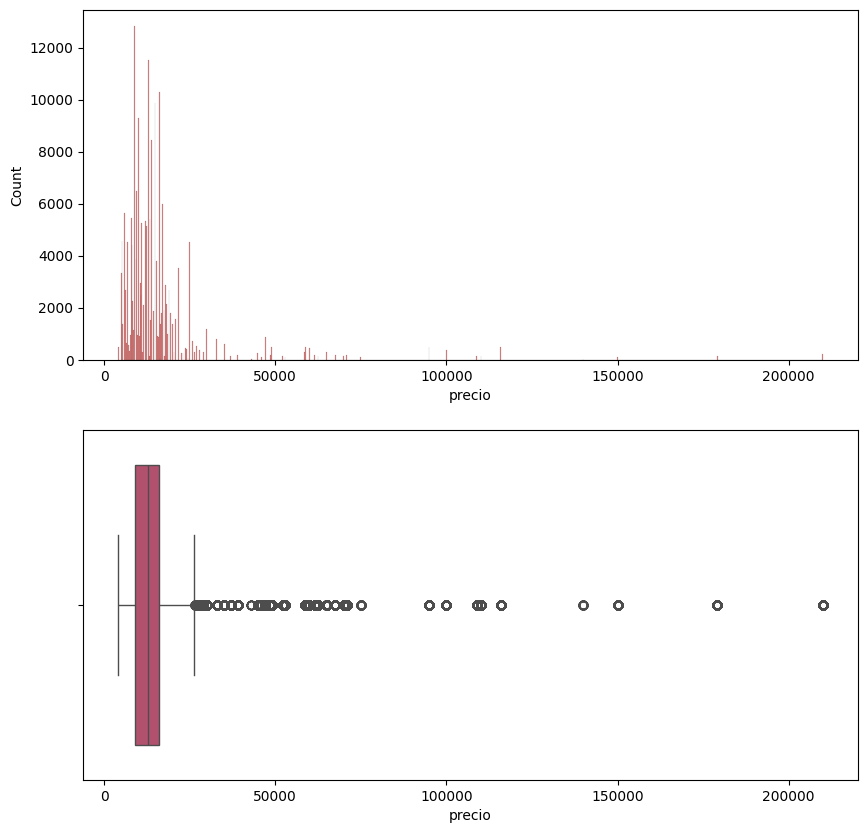

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficas comparativas de los datos numericos
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

colors = sns.color_palette("flare", 2)

sns.histplot(ax=ax[0], data=pairing_df, x='precio', color=colors[0])
sns.boxplot(ax=ax[1], data=pairing_df, x='precio', palette='flare')

plt.show()

**Nota:**
- Los datos de precios estan segados hacia la izquerda
- Existen muchos outliers en los datos de precios

/tmp/ipykernel_956/3815940669.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0, 0], data=pairing_df, x='edad', palette='flare')


/tmp/ipykernel_956/3815940669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0, 1], data=pairing_df, x='productos', palette='flare').set_xticklabels([])
/tmp/ipykernel_956/3815940669.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[0, 2], data=pairing_df, x='categorias', palette='flare')
/tmp/ipykernel_956/3815940669.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[1, 0], data=pairing_df, x='url_imagen', palette='flare').set_xticklabels([])
/tmp/ipykernel_956/3815940669.py:8: FutureWarning: 

Passing `palet

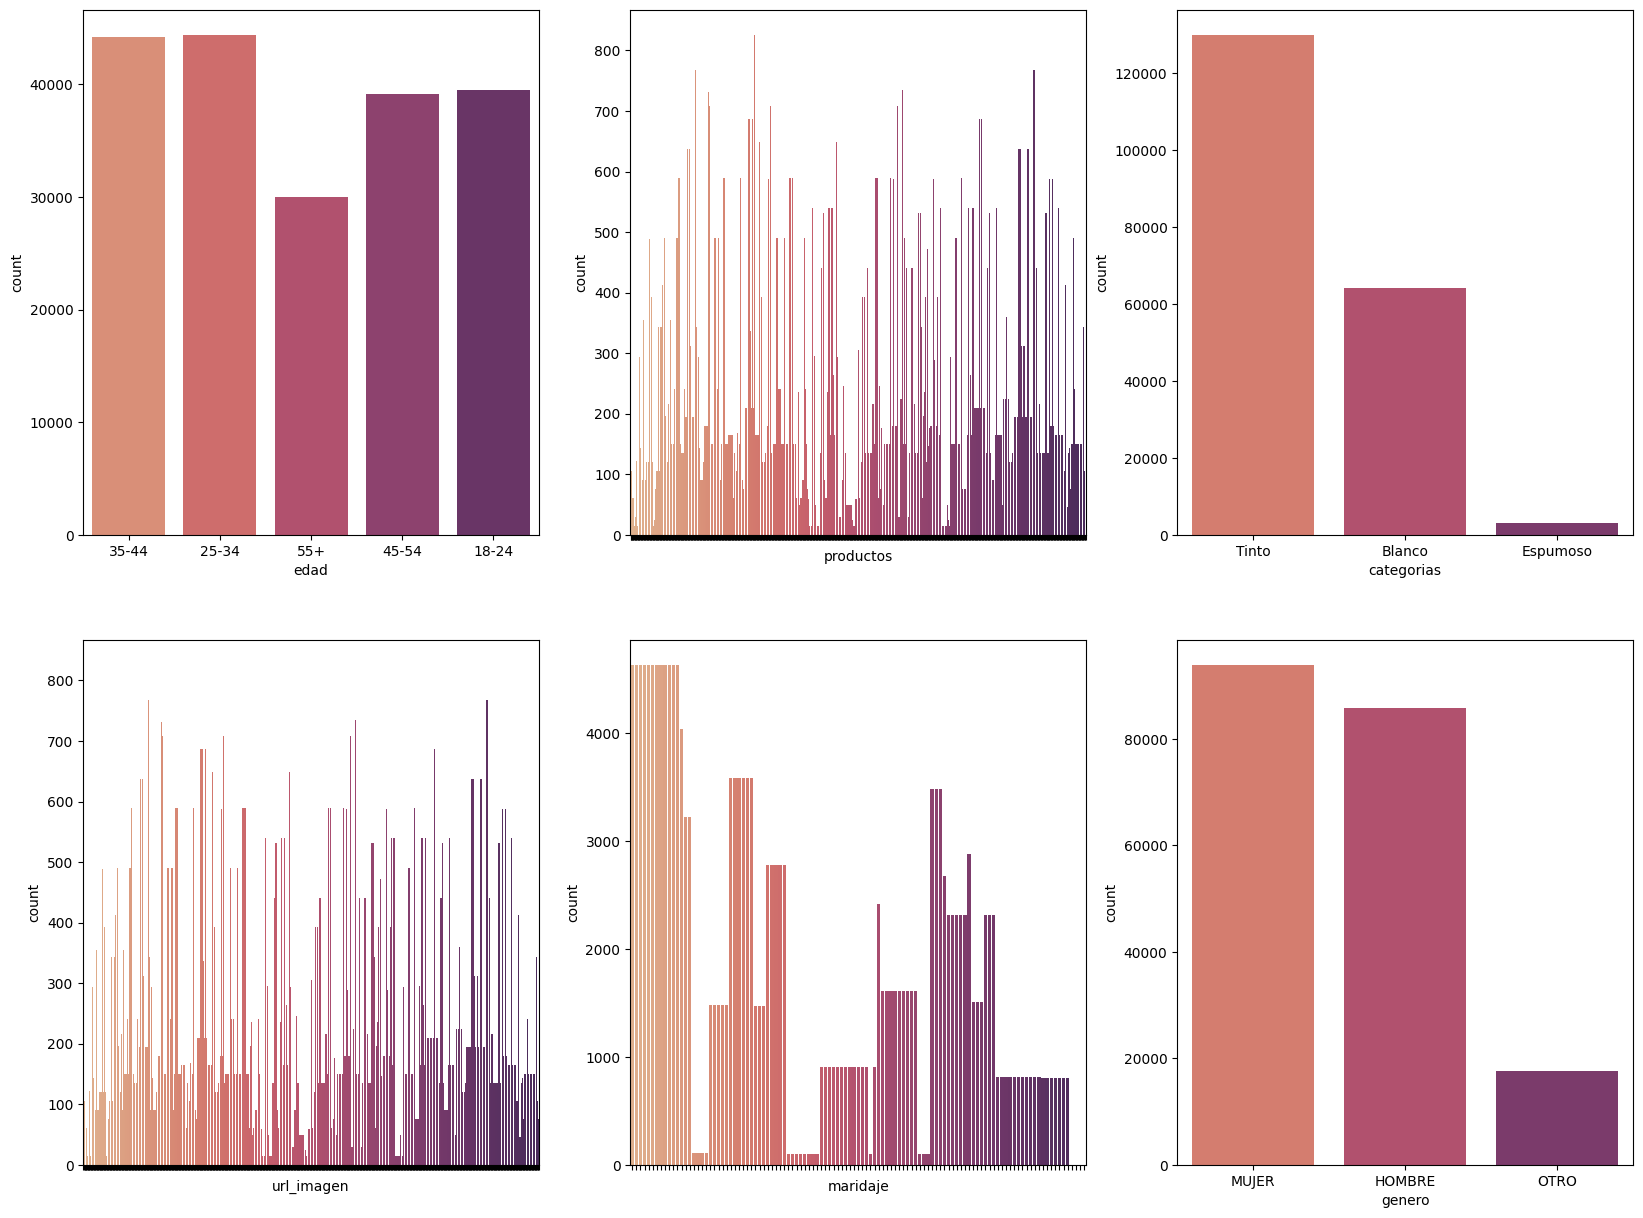

In [11]:
# Graficas comparativas de los datos categoricos
fig, ax = plt.subplots(2, 3, figsize=(20, 15))

sns.countplot(ax=ax[0, 0], data=pairing_df, x='edad', palette='flare')
sns.countplot(ax=ax[0, 1], data=pairing_df, x='productos', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[0, 2], data=pairing_df, x='categorias', palette='flare')
sns.countplot(ax=ax[1, 0], data=pairing_df, x='url_imagen', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[1, 1], data=pairing_df, x='maridaje', palette='flare').set_xticklabels([])
sns.countplot(ax=ax[1, 2], data=pairing_df, x='genero', palette='flare')

plt.show()

**Información grafica:**
- Podemos observar que los rangos de edad inician de desde la mayoría de edad en Chile, que es la edad legal para poder consumir bebidas alcoholicas. Además, se puede ver que el mayor consumo del cual se tiene información esta entre los mayores de 20 años y los 50 años, siendo la media los 40 años.
- Existe una variedad considerable de vinos para recomendar.
- Los vinos más encontrados corresponden a la categoria de Tintos y se asocian más a Mujeres.

In [12]:
Q1_precio = pairing_df['precio'].quantile(0.25)
Q3_precio = pairing_df['precio'].quantile(0.75)
IQR_precio = Q3_precio - Q1_precio

# Calculate the lower and upper limits for each column
lower_limit_precio = Q1_precio - 1.5 * IQR_precio
upper_limit_precio = Q3_precio + 1.5 * IQR_precio

# Calculate the number of outliers for each column
outliers_precio = pairing_df[(pairing_df['precio'] < lower_limit_precio) | (pairing_df['precio'] > upper_limit_precio)]

# Calculate the percentage of outliers for each column
percentage_outliers_precio = len(outliers_precio) / len(pairing_df) * 100

# Print the results
print(f'Percentage of outliers in the column "precios": {percentage_outliers_precio}%')

Percentage of outliers in the column "precios": 5.509488281566783%


In [13]:
pairing_nol = pairing_df[(pairing_df['precio'] >= lower_limit_precio) & (pairing_df['precio'] <= upper_limit_precio)]
pairing_nol.reset_index(inplace=True)
pairing_nol.drop(["index"], axis=1, inplace=True)
pairing_nol.head()

/tmp/ipykernel_956/3171870719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairing_nol.drop(["index"], axis=1, inplace=True)


,productos,categorias,precio,url_imagen,maridaje,genero,edad
0,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44
1,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,25-34
2,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,HOMBRE,35-44
3,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,35-44
4,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,25-34


/tmp/ipykernel_956/825104188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax[1], data=pairing_nol, x='precio', palette='flare')


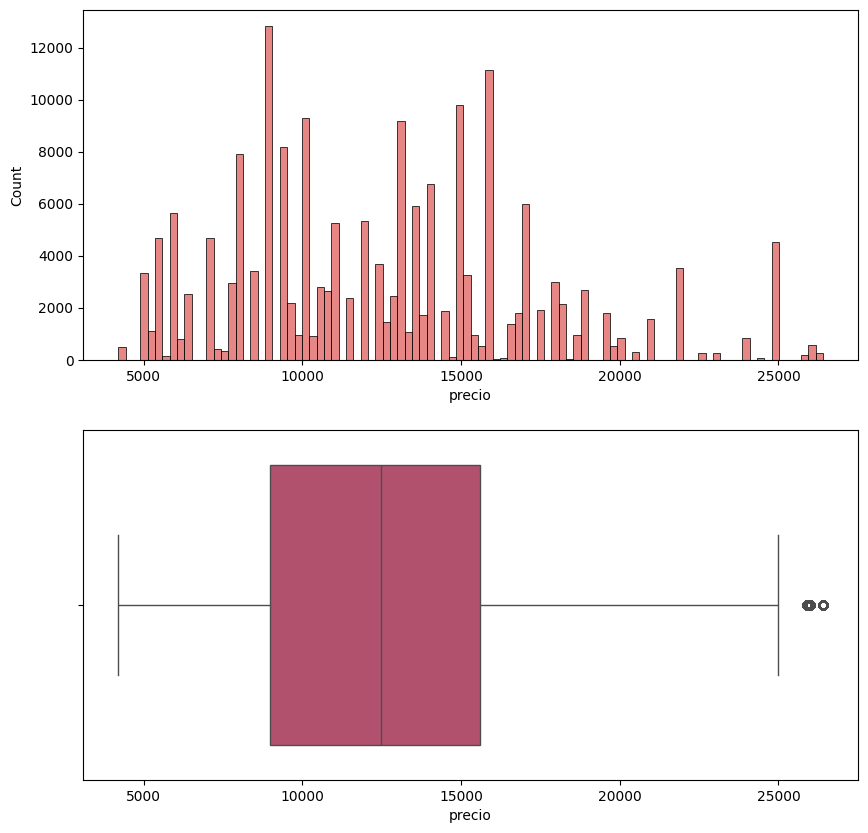

In [14]:
# Graficas comparativas de los datos numericos
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

colors = sns.color_palette("flare", 2)

sns.histplot(ax=ax[0], data=pairing_nol, x='precio', color=colors[0])
sns.boxplot(ax=ax[1], data=pairing_nol, x='precio', palette='flare')

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder_productos = LabelEncoder()
pairing_nol["productos_n"] = label_encoder_productos.fit_transform(pairing_nol["productos"])

label_encoder_categorias = LabelEncoder()
pairing_nol["categorias_n"] = label_encoder_categorias.fit_transform(pairing_nol["categorias"])

label_encoder_maridaje = LabelEncoder()
pairing_nol["maridaje_n"] = label_encoder_maridaje.fit_transform(pairing_nol["maridaje"])

label_encoder_genero = LabelEncoder()
pairing_nol["genero_n"] = label_encoder_genero.fit_transform(pairing_nol["genero"])

pairing_nol.head()

/tmp/ipykernel_956/4235503700.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairing_nol["productos_n"] = label_encoder_productos.fit_transform(pairing_nol["productos"])
/tmp/ipykernel_956/4235503700.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairing_nol["categorias_n"] = label_encoder_categorias.fit_transform(pairing_nol["categorias"])
/tmp/ipykernel_956/4235503700.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,productos,categorias,precio,url_imagen,maridaje,genero,edad,productos_n,categorias_n,maridaje_n,genero_n
0,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44,690,2,27,1
1,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,25-34,690,2,27,1
2,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,HOMBRE,35-44,690,2,27,0
3,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,35-44,690,2,53,1
4,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,25-34,690,2,53,1


In [16]:
ordinal_mapping = {'18-24': 1, '25-34': 2, '35-44': 3, '45-54': 4, '55+': 5}
pairing_nol["edad_n"] = pairing_nol["edad"].map(ordinal_mapping)

pairing_nol.head()

/tmp/ipykernel_956/3889515069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pairing_nol["edad_n"] = pairing_nol["edad"].map(ordinal_mapping)


,productos,categorias,precio,url_imagen,maridaje,genero,edad,productos_n,categorias_n,maridaje_n,genero_n,edad_n
0,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,35-44,690,2,27,1,3
1,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,MUJER,25-34,690,2,27,1,2
2,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Cheddar,HOMBRE,35-44,690,2,27,0,3
3,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,35-44,690,2,53,1,3
4,Viña 3 Monos Cabernet Sauvignon 2019,Tinto,10990,https://cav.cl/storage/sku_images/31464.jpg,Gouda,MUJER,25-34,690,2,53,1,2


In [17]:
wine_data_df = pairing_nol[['productos', 'url_imagen']].copy()
wine_data_df.drop_duplicates(inplace=True)
wine_data_df.reset_index(inplace=True)
wine_data_df.drop(['index'], axis=1, inplace=True)
wine_data_df

,productos,url_imagen
0,Viña 3 Monos Cabernet Sauvignon 2019,https://cav.cl/storage/sku_images/31464.jpg
1,Viña 3 Monos Carignan/Garnacha Mirador Del Nam...,https://cav.cl/storage/sku_images/28727.jpg
2,7 Colores Limited Edition Syrah 2020,https://cav.cl/storage/sku_images/31010.jpg
3,Achaval Ferrer Mendoza Malbec 2021,https://cav.cl/storage/sku_images/31264.jpg
4,Aila Heaven Cabernet Sauvignon Gran Reserva 2021,https://cav.cl/storage/sku_images/28846.jpg
...,...,...
699,Vultur Toromiro Carignan 2020,https://cav.cl/storage/sku_images/29081.jpg
700,Vultur Globo Carmenere 2021,https://cav.cl/storage/sku_images/31225.jpg
701,Vultur Globo Red Blend 2020,https://cav.cl/storage/sku_images/29668.jpg
702,William Fevre Espino Reserva Especial Cabernet...,https://cav.cl/storage/sku_images/30105.jpg


In [18]:
wine_data_df.to_csv('wine_data.csv')

In [19]:
pairing_encoded = pairing_nol[["productos_n", "categorias_n", "precio", "maridaje_n", 'genero_n', 'edad_n']].copy()
pairing_encoded

,productos_n,categorias_n,precio,maridaje_n,genero_n,edad_n
0,690,2,10990,27,1,3
1,690,2,10990,27,1,2
2,690,2,10990,27,0,3
3,690,2,10990,53,1,3
4,690,2,10990,53,1,2
...,...,...,...,...,...,...
186421,702,2,13990,41,1,5
186422,702,2,13990,41,0,5
186423,702,2,13990,41,0,4
186424,702,2,13990,41,1,2


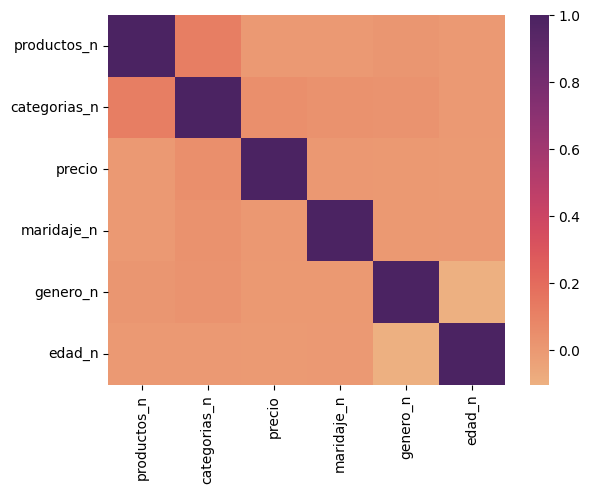

In [20]:
corr = pairing_encoded.corr()

sns.heatmap(corr, annot=True, cmap='flare')

plt.show()

#### **Selección de Variable y Entrenamiento**

In [21]:
from sklearn.model_selection import train_test_split

X = pairing_encoded.drop(["productos_n"], axis=1)
y = pairing_encoded["productos_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_wine = DecisionTreeClassifier()
dt_wine.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("dt_wine accuracy is %2.2f" % accuracy_score(y_test, dt_wine.predict(X_test)))
print(classification_report(y_test, dt_wine.predict(X_test)))

dt_wine accuracy is 0.18
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        20
           2       0.85      0.92      0.88        12
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00        25
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        26
           9       0.02      0.04      0.03        23
          10       0.45      0.52      0.49        65
          11       0.01      0.03      0.02        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        19
          16       0.02      0.01      0.01        69
  

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the hipperparameters
hiperparameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30, 50, 100],
    'max_features': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=dt_wine, param_grid=hiperparameters, scoring='accuracy', cv=5, n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameter
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [27]:
dt_wine_best = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = 5, min_samples_leaf = 1, splitter = 'best')
dt_wine_best.fit(X_train, y_train)

print("dt_wine_best accuracy is %2.2f" % accuracy_score(y_test, dt_wine_best.predict(X_test)))
print(classification_report(y_test, dt_wine_best.predict(X_test)))

dt_wine_best accuracy is 0.33
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00        20
           2       0.60      1.00      0.75        12
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00         4
           5       1.00      1.00      1.00        25
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00        26
           9       0.00      0.00      0.00        23
          10       0.44      1.00      0.61        65
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        30
          13       0.00      0.00      0.00        32
          14       0.00      0.00      0.00        17
          15       0.00      0.00      0.00        19
          16       0.11      0.01      0.03        

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [28]:
from pickle import dump

dump(dt_wine_best, open("../modelsV3/dt_wine_best.pkl", "wb"))

label_encoders = {
    'productos': label_encoder_productos.classes_,
    'categorias': label_encoder_categorias.classes_,
    'maridaje': label_encoder_maridaje.classes_,
    'genero': label_encoder_genero.classes_,
}

with open('../modelsV3/label_encoders.pkl', 'wb') as f: dump(label_encoders, f)